# Implementing logistic regression from scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log, dot, e
from numpy.random import rand
from sklearn.metrics import accuracy_score
from skimage.color import rgb2gray
from tqdm import tqdm

In [2]:
import os
os.chdir('C://Users//santosh//Desktop')
path='C://Users//santosh//Desktop//d.csv'

## 2 Q

In [3]:
xt=pd.read_csv(path)# READING DATA
xt.columns # printing columns


Index(['kid ', 'parents', 'Unnamed: 2'], dtype='object')

In [4]:
xt.shape

(200, 3)

Text(0.5, 1.0, 'Class value count')

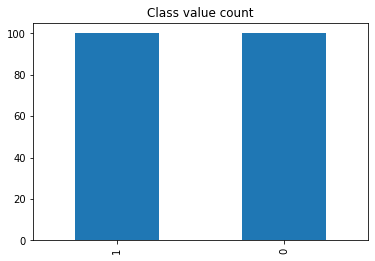

In [5]:
xt['Unnamed: 2'].value_counts().plot(kind='bar')
plt.title('Class value count')

In [6]:
y=xt['Unnamed: 2'].to_numpy() # separating y varaible from xt  
xt.drop(['Unnamed: 2'],axis=1,inplace=True)# dropping y from xt

## Computing cost sigmoid and cost function for logistic regression

### 2.a

In [7]:
def sigmoid( z): 
    """ computes sigmoid function 
    input: z
    returns sigmoid (z)"""
    return 1 / (1 + e**(-z))
    
def cost_function( X, y, weights,lamb):  
    """computes the logistic loss function for given X and y
    inputs
    X: dataframe x with lenght M 
    y: output class labels
    weights:weights are intialized randomly based on dimensions of data
    lamb=hyperparameter in logistic regression 
    
    returns loss L
    """
    
    M=len(X)# number of data points
    b=rand()# intialising intercept term b to random
    z = dot(X, weights)+b # computing weights.T * X
    predict_1 = y * log(sigmoid(z)) # computing log(sigmoid(z)) for class 1
    predict_0 = (1 - y) * log(1 -sigmoid(z)) # computing log(sigmoid(z)) for  class 0
     # returning log loss l
    return -sum/M((predict_1 + predict_0)  +lamb *(dot( weights,weights))/2)

## gradient descent on cost function

### 2.b

In [8]:
def fit( X, y,lamb,weights, epochs=1000 ,lr=.05):
    """Fit function computes gradient descent on Loss L  given X and y
    inputs
    X: dataframe x with lenght M 
    y: output class labels
    lamb:hyperpar
    weights:weights are intialized randomly based on dimensions of data
    epochs: number of iterations to compute the loss 
    lr:learning rate
    
    returns weights vector ,intercept term b
    """
    
    loss=[] # storing loss
    M= len(X)# lenght of input X
    b=rand() # intializing intercept term b
    weights_new=np.array([float('inf') for i in range(X.shape[1])] )# intializing new weight to -inf
    count=0 # counting number of iterations
    
 
    
    while (weights_new).mean()>0.0000001 and count<epochs :   
        
        # while loop runs until new weights are less then given thresold or till epochs specified
       
    # Gradient Descent
        y_hat = sigmoid(dot(X, weights)+b) # predicted label
        weights_new= (lr /M)*(dot(X.T,  y_hat - y))+lamb *weights # computing partial derivative for function l
        weights =weights -  weights_new # applying gradient descent to update weights
        b=b-(lr/M )* sum( y_hat - y)  # to update intercept term
        count+=1
   # print(count)
     
   
        print('Number of epochs taken:',count)
    return weights,b
    

    

## Predict function

### 2.c

In [9]:
def predict( X,weights,b):    
    """Predicting class label based on thresold 0.5"""
    # Predicting with sigmoid function
    z = dot(X,weights)+b
    # Returning binary result
    return sigmoid(z), [ 1 if i > 0.5 else 0 for i in sigmoid(z)]

## Fitting custom logistic regression on cifar-10 dataset

### 2d

In [10]:
lam=[0.0001,0.001,0.01,0.1,1,5,10]# intializing lambda to multiple values
lr=[0.001,0.01,0.1,1]# intializing learning rate to multiple values
# this is a grid search method
for i in lam: # iterating through every lambda value
    for j in lr:# iterating through every lr value
        
        print('lambda: ',i,' learning rate' ,j)
        weights = rand(xt.shape[1])# intialising random weights
        weights=fit(xt,y,i,weights,lr=.005) # fitting on x and y which defined above
        print('weights obtained',weights[0])
        print('intercept term obtained',weights[1])
        prediction=predict( xt,weights[0],weights[1])
        print('accuracy:',accuracy_score(y, prediction[1], normalize=True))
        

lambda:  0.0001  learning rate 0.001
Number of epochs taken: 1
Number of epochs taken: 2
Number of epochs taken: 3
Number of epochs taken: 4
Number of epochs taken: 5
Number of epochs taken: 6
Number of epochs taken: 7
Number of epochs taken: 8
Number of epochs taken: 9
Number of epochs taken: 10
Number of epochs taken: 11
Number of epochs taken: 12
Number of epochs taken: 13
Number of epochs taken: 14
Number of epochs taken: 15
Number of epochs taken: 16
Number of epochs taken: 17
Number of epochs taken: 18
Number of epochs taken: 19
Number of epochs taken: 20
Number of epochs taken: 21
Number of epochs taken: 22
Number of epochs taken: 23
Number of epochs taken: 24
Number of epochs taken: 25
Number of epochs taken: 26
Number of epochs taken: 27
Number of epochs taken: 28
Number of epochs taken: 29
Number of epochs taken: 30
Number of epochs taken: 31
Number of epochs taken: 32
Number of epochs taken: 33
Number of epochs taken: 34
Number of epochs taken: 35
Number of epochs taken: 36


Number of epochs taken: 33
Number of epochs taken: 34
Number of epochs taken: 35
Number of epochs taken: 36
Number of epochs taken: 37
Number of epochs taken: 38
Number of epochs taken: 39
Number of epochs taken: 40
Number of epochs taken: 41
Number of epochs taken: 42
Number of epochs taken: 43
Number of epochs taken: 44
Number of epochs taken: 45
Number of epochs taken: 46
Number of epochs taken: 47
Number of epochs taken: 48
Number of epochs taken: 49
Number of epochs taken: 50
Number of epochs taken: 51
Number of epochs taken: 52
Number of epochs taken: 53
Number of epochs taken: 54
Number of epochs taken: 55
Number of epochs taken: 56
Number of epochs taken: 57
Number of epochs taken: 58
Number of epochs taken: 59
Number of epochs taken: 60
Number of epochs taken: 61
Number of epochs taken: 62
Number of epochs taken: 63
Number of epochs taken: 64
Number of epochs taken: 65
Number of epochs taken: 66
Number of epochs taken: 67
Number of epochs taken: 68
Number of epochs taken: 69
N

Number of epochs taken: 64
Number of epochs taken: 65
Number of epochs taken: 66
Number of epochs taken: 67
Number of epochs taken: 68
Number of epochs taken: 69
Number of epochs taken: 70
Number of epochs taken: 71
Number of epochs taken: 72
Number of epochs taken: 73
Number of epochs taken: 74
Number of epochs taken: 75
Number of epochs taken: 76
Number of epochs taken: 77
Number of epochs taken: 78
Number of epochs taken: 79
Number of epochs taken: 80
Number of epochs taken: 81
Number of epochs taken: 82
Number of epochs taken: 83
Number of epochs taken: 84
Number of epochs taken: 85
Number of epochs taken: 86
Number of epochs taken: 87
Number of epochs taken: 88
Number of epochs taken: 89
Number of epochs taken: 90
Number of epochs taken: 91
Number of epochs taken: 92
Number of epochs taken: 93
Number of epochs taken: 94
Number of epochs taken: 95
Number of epochs taken: 96
Number of epochs taken: 97
Number of epochs taken: 98
Number of epochs taken: 99
Number of epochs taken: 100


Number of epochs taken: 29
Number of epochs taken: 30
Number of epochs taken: 31
Number of epochs taken: 32
Number of epochs taken: 33
Number of epochs taken: 34
Number of epochs taken: 35
Number of epochs taken: 36
Number of epochs taken: 37
Number of epochs taken: 38
Number of epochs taken: 39
Number of epochs taken: 40
Number of epochs taken: 41
Number of epochs taken: 42
Number of epochs taken: 43
Number of epochs taken: 44
Number of epochs taken: 45
Number of epochs taken: 46
Number of epochs taken: 47
Number of epochs taken: 48
Number of epochs taken: 49
Number of epochs taken: 50
Number of epochs taken: 51
Number of epochs taken: 52
Number of epochs taken: 53
Number of epochs taken: 54
Number of epochs taken: 55
Number of epochs taken: 56
Number of epochs taken: 57
Number of epochs taken: 58
Number of epochs taken: 59
Number of epochs taken: 60
Number of epochs taken: 61
Number of epochs taken: 62
Number of epochs taken: 63
Number of epochs taken: 64
Number of epochs taken: 65
N

Number of epochs taken: 22
Number of epochs taken: 23
Number of epochs taken: 24
Number of epochs taken: 25
Number of epochs taken: 26
Number of epochs taken: 27
Number of epochs taken: 28
Number of epochs taken: 29
Number of epochs taken: 30
Number of epochs taken: 31
Number of epochs taken: 32
Number of epochs taken: 33
Number of epochs taken: 34
Number of epochs taken: 35
Number of epochs taken: 36
Number of epochs taken: 37
Number of epochs taken: 38
Number of epochs taken: 39
Number of epochs taken: 40
Number of epochs taken: 41
Number of epochs taken: 42
Number of epochs taken: 43
Number of epochs taken: 44
Number of epochs taken: 45
Number of epochs taken: 46
weights obtained [ 0.0001136  -0.03644859]
intercept term obtained 0.887276587757798
accuracy: 0.5
lambda:  0.1  learning rate 0.01
Number of epochs taken: 1
Number of epochs taken: 2
Number of epochs taken: 3
Number of epochs taken: 4
Number of epochs taken: 5
Number of epochs taken: 6
Number of epochs taken: 7
Number of e

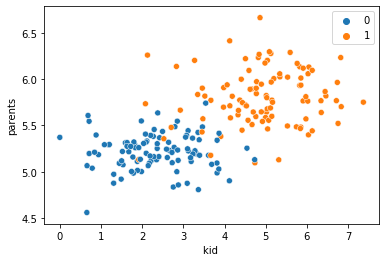

In [11]:
sns.scatterplot(data=xt, x="kid ", y="parents", hue=y)
#sns.lineplot(data=xt, y=list(xt['parents']*(weights[0][1])-(weights[1])), x='parents')

plt.show()

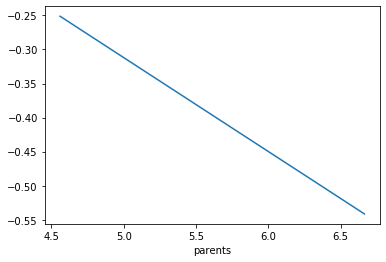

In [12]:
sns.lineplot(data=xt, y=list(xt['parents']*(weights[0][1])+(weights[1])), x='parents')

## 3Q

In [13]:
import tensorflow as tf
import keras

## Loading cifar 10 

In [14]:
(x_train1, y_train), (x_test1, y_test)=tf.keras.datasets.cifar10.load_data() # reading cifar 10 data from keras

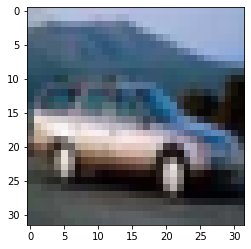

In [15]:
# ploting image
plt.imshow(x_train1[4].reshape(32,32,3))

## preprocessing image data

In [16]:
# converting image to gray scale
x_train1=rgb2gray(x_train1)
x_test1=rgb2gray(x_test1)

In [17]:
# verfying shape
x_train1.shape

(50000, 32, 32)

In [18]:
d1, d2,d3= x_train1.shape # gathering shape of train in a tuple for reshaping
d11,d22,d33=x_test1.shape# gathering shape of train in a tuple for reshaping
x_train = x_train1.reshape((d1, d2*d3))# flattening train image matrix to vectors
x_test = x_test1.reshape((d11, d2*d3))# flattening test image matrix to vectors
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255 # scaling train data
x_test /= 255# scaling test data

### 3.a

In [19]:
def y_change(y, cl):
    """function computes ovr type labels"""
    y_pr=[]
    for i in range(0, len(y)):
        if y[i] == cl:
            y_pr.append(1)
        else:
            y_pr.append(0)
    return y_pr

In [20]:
# fitting on train data
weight_vectors=[]   # intializing list for storing weight vectors
#prob=[]
#y_predition=[]
#accuracy=[]
for i in range(0,10): # this loop runs for 10 times i.e 10 classifiers
    weights= rand(x_train.shape[1]) # intiliazing weights for
    print('----------------------------------for class',i,'-------------------------------------------')
    lamb=1
    y_true=np.asarray(y_change(y_train,i))# fcalling y_change function for ovr labels
    weights=fit(x_train,y_true,lamb,weights,lr=15,epochs=100) # fitting won data
    weight_vectors.append(weights) # toring weight vectors
   


----------------------------------for class 0 -------------------------------------------
Number of epochs taken: 1
Number of epochs taken: 2
----------------------------------for class 1 -------------------------------------------
Number of epochs taken: 1
Number of epochs taken: 2
----------------------------------for class 2 -------------------------------------------
Number of epochs taken: 1
Number of epochs taken: 2
----------------------------------for class 3 -------------------------------------------
Number of epochs taken: 1
Number of epochs taken: 2
----------------------------------for class 4 -------------------------------------------
Number of epochs taken: 1
Number of epochs taken: 2
----------------------------------for class 5 -------------------------------------------
Number of epochs taken: 1
Number of epochs taken: 2
----------------------------------for class 6 -------------------------------------------
Number of epochs taken: 1
Number of epochs taken: 2
------

### 3.b

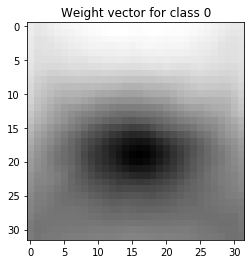

In [21]:
plt.title('Weight vector for class 0')
plt.imshow((weight_vectors[0][0].reshape(32,32)),cmap=plt.cm.gray)


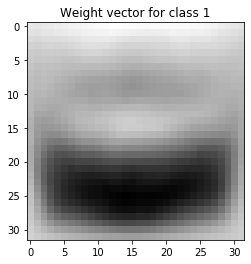

In [22]:
plt.title('Weight vector for class 1')
plt.imshow((weight_vectors[1][0].reshape(32,32)),cmap=plt.cm.gray)


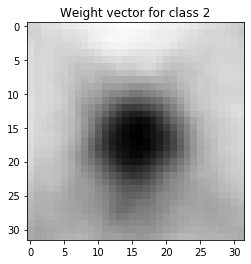

In [23]:
plt.title('Weight vector for class 2')
plt.imshow((weight_vectors[2][0].reshape(32,32)),cmap=plt.cm.gray)

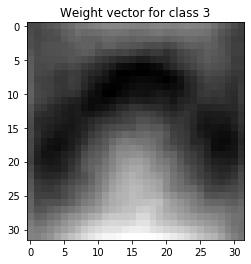

In [24]:
plt.title('Weight vector for class 3')
plt.imshow((weight_vectors[3][0].reshape(32,32)),cmap=plt.cm.gray)


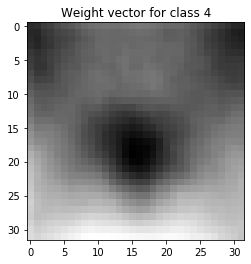

In [25]:
plt.title('Weight vector for class 4')
plt.imshow((weight_vectors[4][0].reshape(32,32)),cmap=plt.cm.gray)

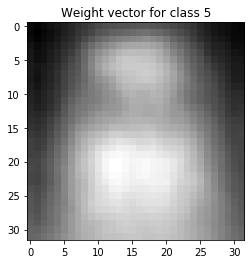

In [26]:
plt.title('Weight vector for class 5')
plt.imshow((weight_vectors[5][0].reshape(32,32)),cmap=plt.cm.gray)

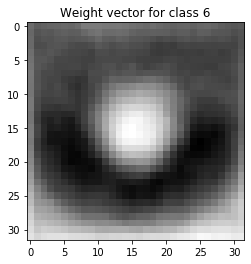

In [27]:
plt.title('Weight vector for class 6')
plt.imshow((weight_vectors[6][0].reshape(32,32)),cmap=plt.cm.gray)

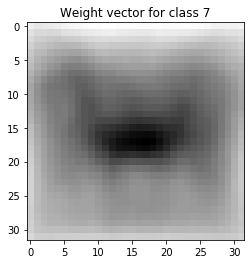

In [28]:
plt.title('Weight vector for class 7')
plt.imshow((weight_vectors[7][0].reshape(32,32)),cmap=plt.cm.gray)

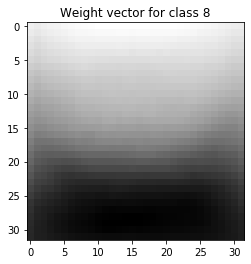

In [29]:

plt.title('Weight vector for class 8')
plt.imshow((weight_vectors[8][0].reshape(32,32)),cmap=plt.cm.gray)

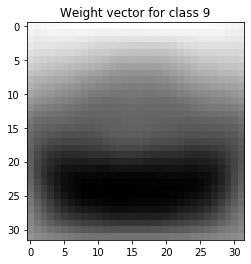

In [30]:
plt.title('Weight vector for class 9')
plt.imshow((weight_vectors[9][0].reshape(32,32)),cmap=plt.cm.gray)

### 3.C

In [31]:

def predict_ovr(X,weights,intercept):
    """This function combines all models obtained in ovr and gives probaliltiy values
    
    inputs :
    X test data
    weights :weights obtained from training 10 ovr classifiers
    intercept term
    
    retunrs final probability values based of number of classifiers trained
    """
    final_prob=[]
    for i in tqdm(range(len(X))): # iterating to the lenght of x
        new_list=[]
        
        for j in range(10): #for 10 classifiers
            
            new_list.append(sigmoid(sum(X[i]*weights[j][0])+weights[j][1])) # dot product on X and weights and then sigmoid
        final_prob.append(new_list) # storing list of probabilities
    return final_prob

In [32]:
final_proba=predict_ovr(x_test,weight_vectors,weight_vectors)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:16<00:00, 616.40it/s]


In [33]:
# getting class label based on max probability values
final_proba1=np.array(final_proba)
y_pred_test=[]
for i in range(final_proba1.shape[0]):
    y_pred_test.append(np.argmax(final_proba1[i]))

In [34]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)

    plt.figure(figsize=(20,4))
    
    labels = range(10)
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.figure(figsize=(15,8))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    

<Figure size 1440x288 with 0 Axes>

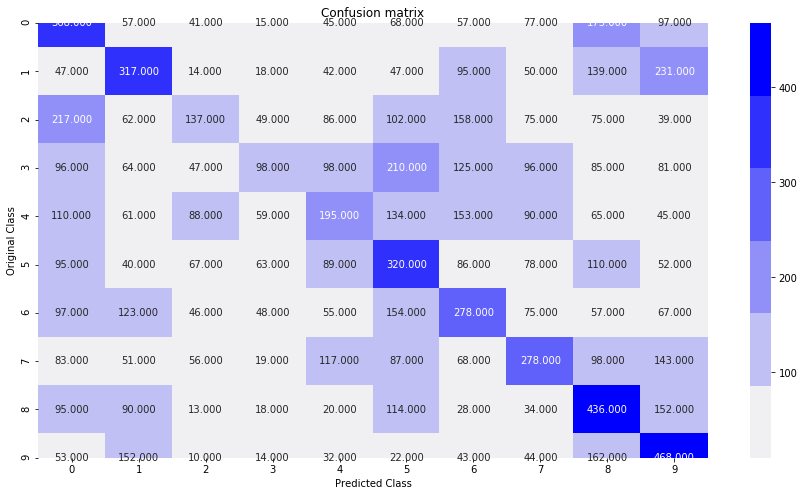

In [35]:
plot_confusion_matrix(y_test, y_pred_test)